# Classification with an Academic Success Dataset

--- 
### SUMMARY 
1. [Read the Data](#1)
2. [Exploratory Data Analysis](#2)
3. [Data Preprocessing](#3)
4. [Fit Models - Random Forest Classifier with CV](#4)
5. [Fit Models - XGBoost Classifier with CV](#5)
6. [Fit Models - Ensemble Classifier 1 with CV](#6)
7. [Fit Models - Ensemble Classifier 2 with CV](#7)
8. [Selected model and conclusions](#8)
9. [Feature importance](#9)
10. [Submission file](#10)
---

# 1. Read the Data
<a id="1"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler, label_binarize
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc, ConfusionMatrixDisplay, RocCurveDisplay, precision_recall_curve, PrecisionRecallDisplay, f1_score
from sklearn.linear_model import LogisticRegression

import xgboost as xgb

pd.set_option('display.max_columns', None)   # Set to None to display all columns
pd.set_option('display.width', 1000)         # Set width to a high value to display columns next to each other

In [2]:
df = pd.read_csv('train.csv')
df.head()

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,1,1,1,9238,1,1,126.0,1,1,19,5,5,122.6,0,0,0,1,0,1,18,0,0,6,6,6,14.500000,0,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,1,17,1,9238,1,1,125.0,1,19,19,9,9,119.8,1,0,0,1,0,0,18,0,0,6,8,4,11.600000,0,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,2,1,17,2,9254,1,1,137.0,1,3,19,2,3,144.7,0,0,0,1,1,0,18,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout
3,3,1,1,3,9500,1,1,131.0,1,19,3,3,2,126.1,1,0,0,1,0,1,18,0,0,7,9,7,12.591250,0,0,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled
4,4,1,1,2,9500,1,1,132.0,1,19,37,4,9,120.1,1,0,0,1,0,0,18,0,0,7,12,6,12.933333,0,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate


In [3]:
df.columns

Index(['id', 'Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance', 'Previous qualification', 'Previous qualification (grade)', 'Nacionality', 'Mother's qualification', 'Father's qualification', 'Mother's occupation', 'Father's occupation', 'Admission grade', 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'International', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)', 'Unemployment rate', 'Inflation rate', 'GDP', 'Target'], 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76518 entries, 0 to 76517
Data columns (total 38 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   id                                              76518 non-null  int64  
 1   Marital status                                  76518 non-null  int64  
 2   Application mode                                76518 non-null  int64  
 3   Application order                               76518 non-null  int64  
 4   Course                                          76518 non-null  int64  
 5   Daytime/evening attendance                      76518 non-null  int64  
 6   Previous qualification                          76518 non-null  int64  
 7   Previous qualification (grade)                  76518 non-null  float64
 8   Nacionality                                     76518 non-null  int64  
 9   Mother's qualification                 

At first glance the dtypes look good and there are no missing values.

Let's explore the basic statistics to see if there are any extremes.

In [5]:
df.describe()

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.00000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000
mean,38258.500000,1.111934,16.054419,1.644410,9001.286377,0.915314,3.658760,132.378766,1.226600,19.837633,23.425076,8.583196,8.882172,125.363971,0.569265,0.003738,0.071382,0.893646,0.315821,0.247393,22.278653,0.006626,0.188871,5.891516,7.352362,4.178520,9.995862,0.05796,0.137053,5.933414,7.234468,4.007201,9.626085,0.062443,11.520340,1.228218,-0.080921
std,22088.988286,0.441669,16.682337,1.229645,1803.438531,0.278416,8.623774,10.995328,3.392183,15.399456,14.921164,17.471591,16.803940,12.562328,0.495182,0.061023,0.257463,0.308292,0.464845,0.431500,6.889241,0.081130,1.175296,1.671776,3.508292,2.687995,5.264224,0.40849,0.933830,1.627182,3.503040,2.772956,5.546035,0.462107,2.653375,1.398816,2.251382
min,0.000000,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,0.000000,0.000000,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,19129.250000,1.000000,1.000000,1.000000,9119.000000,1.000000,1.000000,125.000000,1.000000,1.000000,4.000000,4.000000,5.000000,118.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,18.000000,0.000000,0.000000,5.000000,6.000000,2.000000,10.666667,0.00000,0.000000,5.000000,6.000000,1.000000,10.000000,0.000000,9.400000,0.300000,-1.700000
50%,38258.500000,1.000000,17.000000,1.000000,9254.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,7.000000,7.000000,124.600000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,19.000000,0.000000,0.000000,6.000000,7.000000,5.000000,12.166667,0.00000,0.000000,6.000000,7.000000,5.000000,12.142857,0.000000,11.100000,1.400000,0.320000
75%,57387.750000,1.000000,39.000000,2.000000,9670.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,9.000000,9.000000,132.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,23.000000,0.000000,0.000000,6.000000,9.000000,6.000000,13.314286,0.00000,0.000000,6.000000,9.000000,6.000000,13.244048,0.000000,12.700000,2.600000,1.790000
max,76517.000000,6.000000,53.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,194.000000,195.000000,190.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,70.000000,1.000000,20.000000,26.000000,45.000000,26.000000,18.875000,12.00000,19.000000,23.000000,33.000000,20.000000,18.000000,12.000000,16.200000,3.700000,3.510000


# 2. Exploratory data Analysis
<a id="2"></a>

### 2.1 Exploring target

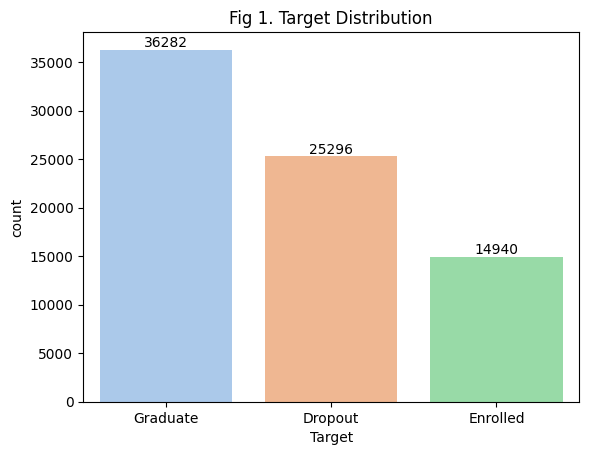

In [6]:
ax = sns.countplot(data=df, x ='Target', palette = 'pastel')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Fig 1. Target Distribution')
plt.show()

### 2.2 Exploring data from df.describe()

##### 2.2.1 Negative values

Let's take a closer look at the last 2 cols, there are some negative values for:
- Inflation rate
- GDP

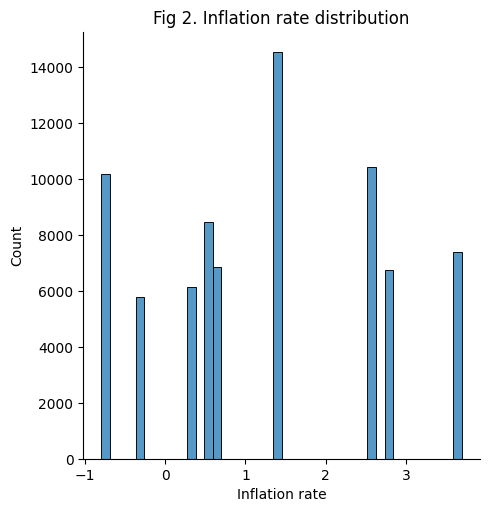

In [7]:
sns.displot(df['Inflation rate'])
plt.title('Fig 2. Inflation rate distribution')
plt.show()

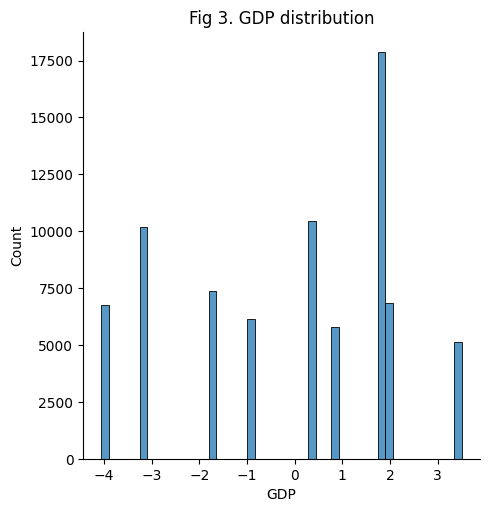

In [8]:
sns.displot(df['GDP'])
plt.title('Fig 3. GDP distribution')
plt.show()

In [9]:
df['Inflation rate'].value_counts()

 1.4    14515
 2.6    10436
-0.8    10183
 0.5     8470
 3.7     7378
 0.6     6846
 2.8     6756
 0.3     6151
-0.3     5779
 0.7        1
-0.6        1
 0.4        1
 2.5        1
Name: Inflation rate, dtype: int64

In [10]:
df['GDP'].value_counts()

 0.32    10436
-3.12    10184
 1.74     9390
 1.79     8471
-1.70     7379
 2.02     6846
-4.06     6757
-0.92     6151
 0.79     5780
 3.51     5123
 0.74        1
Name: GDP, dtype: int64

__Remarks:__

- It looks like these are in fact macroeconomic indicators. GDP looks like it was normalized.
- There are 13 different inflation rates and 11 different GDP values. This could suggest that the students in the dataset come from at least 13 different regions.
- However, GDP and Inflation rate are time dependent so they can change over time. Since this is not a time series problem, the dataset may span multiple years or quarters so we can expect to see different values for inflation and GDP for different time periods, even if all students are from the same country.
- Moreover, there is a Nacionality column. Let's quickly see how many nationalities there are.

In [11]:
df['Nacionality'].value_counts()

1      76013
41       221
26        67
6         56
22        56
24        15
11        15
2         13
103       12
105        9
101        9
100        9
21         6
25         6
62         6
17         2
109        2
32         1
Name: Nacionality, dtype: int64

In [12]:
print(f'There are {len(df["Nacionality"].value_counts())} nacionalities, but most come from 1')

There are 18 nacionalities, but most come from 1


##### 2.2.2 Data with high std

- This is for column Course

In [13]:
df['Course'].value_counts()

9500    12074
9773     8214
9238     7935
9147     7741
9254     5425
9085     5373
9670     4760
9991     4057
9003     3733
9070     3281
9853     3198
9119     3004
171      2859
8014     2438
9130     1606
9556      746
33         72
979         1
39          1
Name: Course, dtype: int64

These are just course codes. High std is attributed to that.

### 2.3 Plotting subplots for target vs. binary features

In [ ]:
data = {'Column Name': [], 'Unique Values': []}

for column in df.columns:
    data['Column Name'].append(column)
    data['Unique Values'].append(df[column].nunique())

unique_counts_df = pd.DataFrame(data)
unique_counts_df.sort_values(by='Unique Values').head(10)

,Column Name,Unique Values
18,Gender,2
21,International,2
19,Scholarship holder,2
17,Tuition fees up to date,2
16,Debtor,2
5,Daytime/evening attendance,2
15,Educational special needs,2
14,Displaced,2
37,Target,3
1,Marital status,6


There are 8 binary features. We'll plot for them.

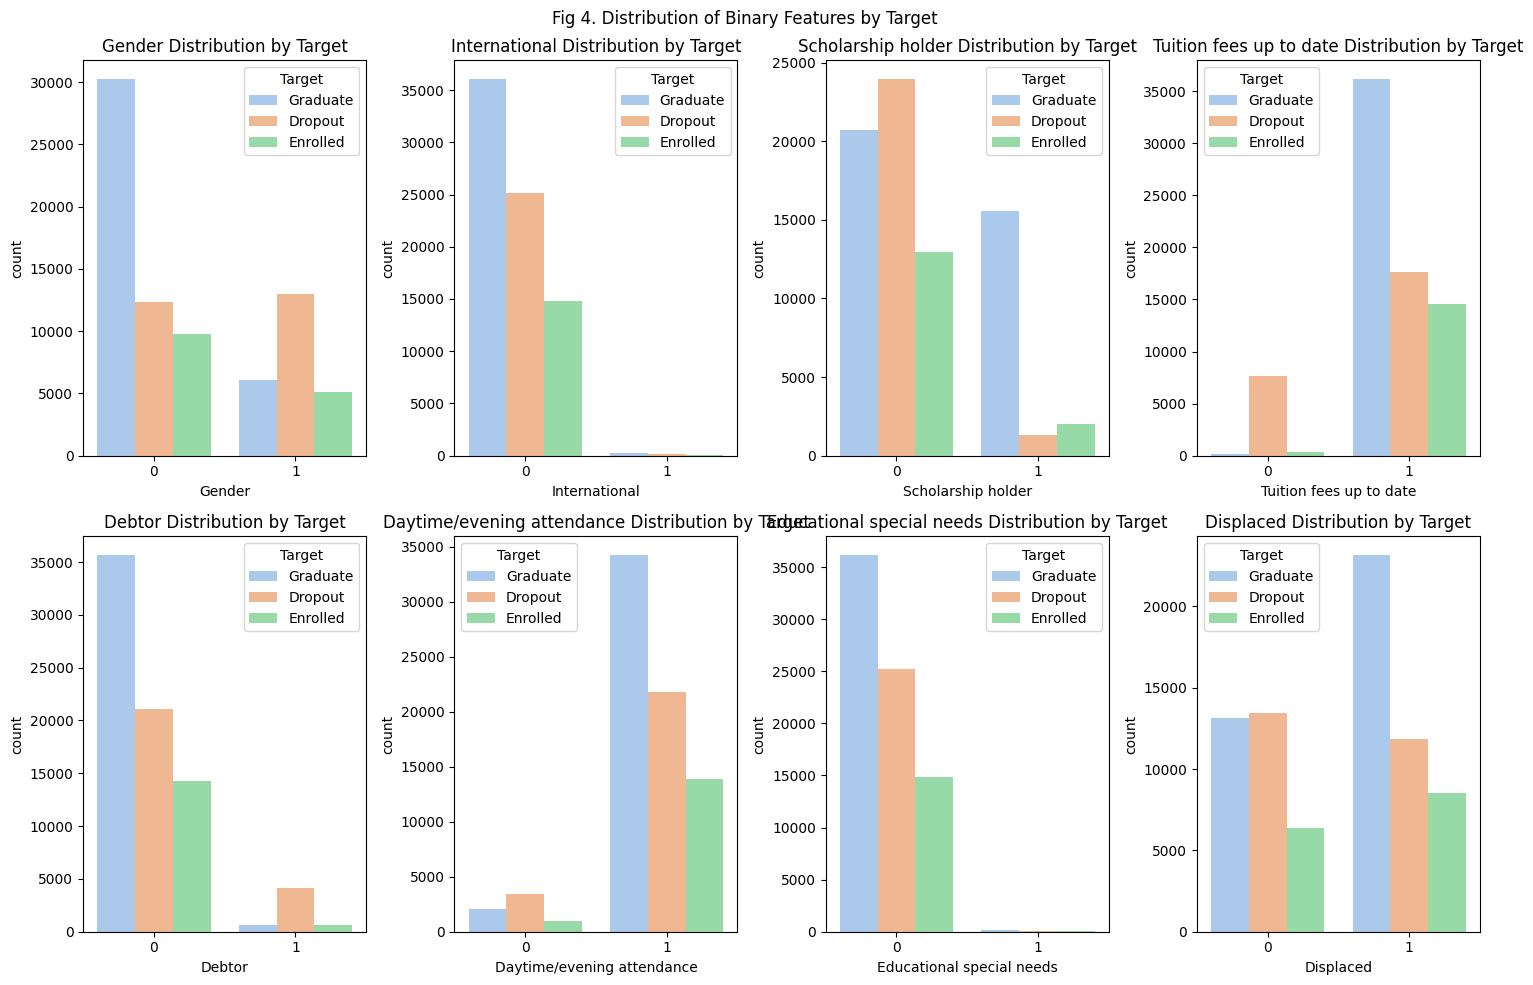

In [15]:
column_names = unique_counts_df.sort_values(by='Unique Values').head(8)['Column Name'].tolist()

plt.figure(figsize=(15, 10))
for ind, val in enumerate(df[column_names]):
    plt.subplot(2,4, ind+1)
    sns.countplot(data=df, x=val, hue='Target', palette = 'pastel')
    plt.title(f'{val} Distribution by Target')

plt.gcf().suptitle('Fig 4. Distribution of Binary Features by Target')
plt.tight_layout()
plt.show()

__Remarks:__
- Gender:
    - Big disproportion between enrolled students in terms of gender. 0 class of enrolled students is almost the double.
    - Even bigger disproportion for Graduates gender. 0 class is 4x 1 class.
    - Interestingly, the number of Dropouts is similar across both genders.
- Scolarship holder:
    - Vast majority of students with scolarship are graduates (very little dropouts).
- Tuition fees up to date:
    - This is a big determinant of dropouts. Students who don't pay on time will drop out.
- Debtor:
    - This column is a crucial financial indicator that could have a significant impact on a student's academic journey, potentially influencing their ability to continue their studies.
    - There are not a lot of students in debt. 
    - But, if you are a in debt, you are very likely to drop out.
- Daytime/evening attendance:
    - No suprises, most students attend the daytime classess and it will increase their chance of graduation.
- Displaced:
    - Interestingly, there are way more displaced students (1) than non-dsiplaced (0).
    - Being displaced increases your chance of graduation.

----
Let's see what else interesting can we plot?
----


In [16]:
unique_counts_df.sort_values(by='Unique Values')

,Column Name,Unique Values
18,Gender,2
21,International,2
19,Scholarship holder,2
17,Tuition fees up to date,2
16,Debtor,2
5,Daytime/evening attendance,2
15,Educational special needs,2
14,Displaced,2
37,Target,3
1,Marital status,6


- Age at enrollment
- Admission grade

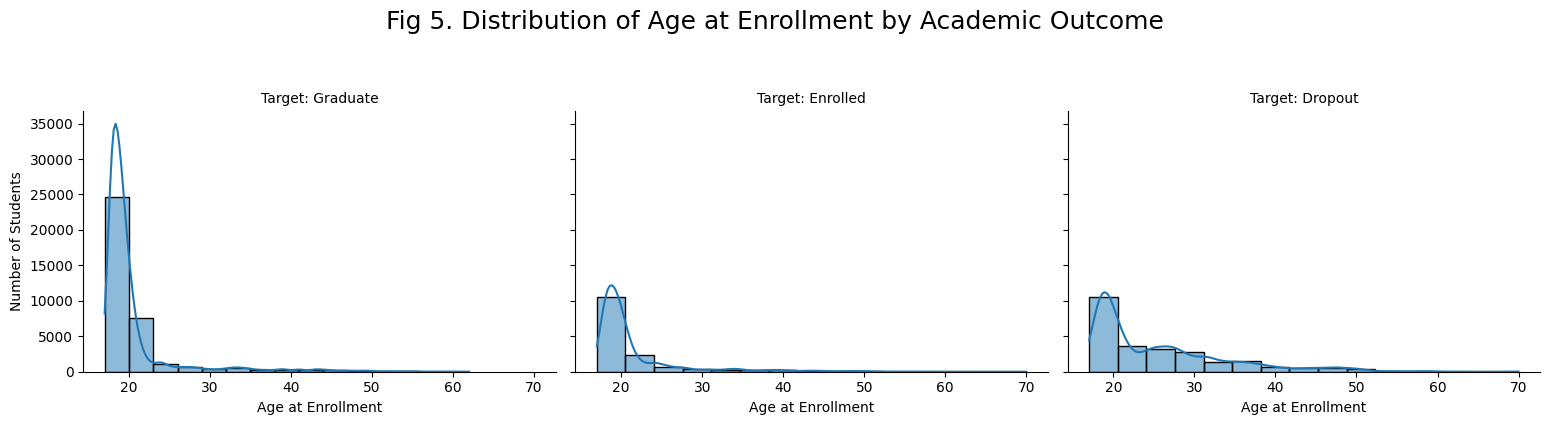

In [ ]:
# Age at enrollment vs. Target (Faceted Histograms)
g1 = sns.FacetGrid(df, col='Target', col_wrap=3, height=4, aspect=1.3, palette='viridis', col_order=['Graduate', 'Enrolled', 'Dropout'])
g1.map_dataframe(sns.histplot, x='Age at enrollment', kde=True, bins=15)
g1.set_axis_labels("Age at Enrollment", "Number of Students")
g1.set_titles("Target: {col_name}")
g1.fig.suptitle('Fig 5. Distribution of Age at Enrollment by Academic Outcome', fontsize=18, y=1.05)
g1.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

__Remarks:__
- People above the age of ~ 25 at the time of enrollment are much more likely to drop out.

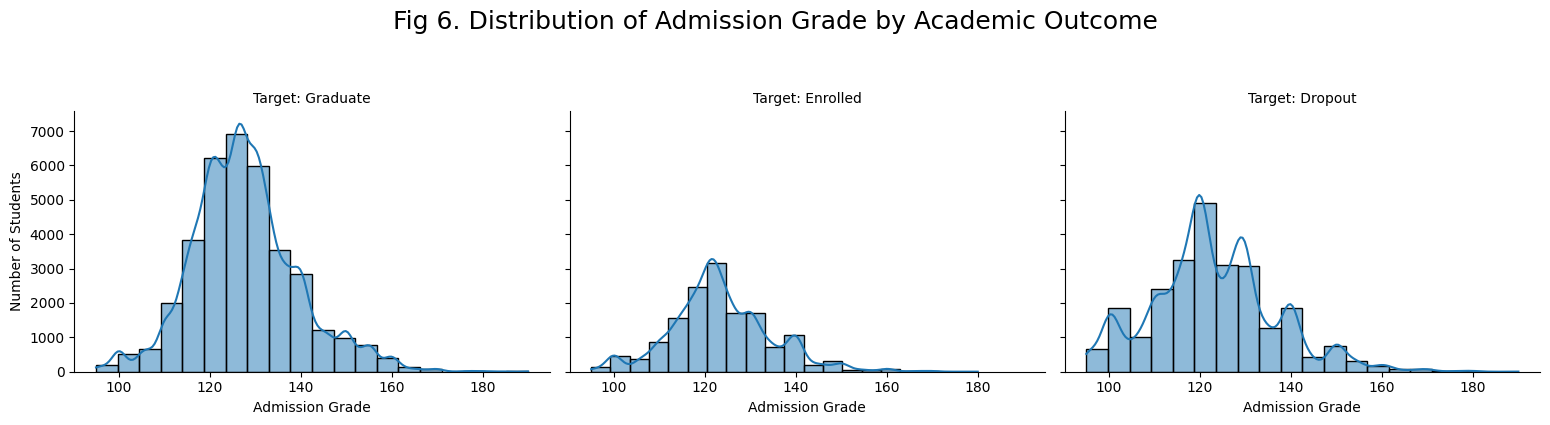

In [ ]:
# Admission grade vs. Target (Faceted Histograms)
g2 = sns.FacetGrid(df, col='Target', col_wrap=3, height=4, aspect=1.3, palette='plasma', col_order=['Graduate', 'Enrolled', 'Dropout'])
g2.map_dataframe(sns.histplot, x='Admission grade', kde=True, bins=20)
g2.set_axis_labels("Admission Grade", "Number of Students")
g2.set_titles("Target: {col_name}")
g2.fig.suptitle('Fig 6. Distribution of Admission Grade by Academic Outcome', fontsize=18, y=1.05)
g2.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

__Remarks:__
- The distribution of Admission grades for Dropouts peaks at a slightly lower Grades (120-125 for Dropouts vs 125-130 for Graduates).
- Additionally, the Admission grades of below ~ 115 are much more common for Dropouts.

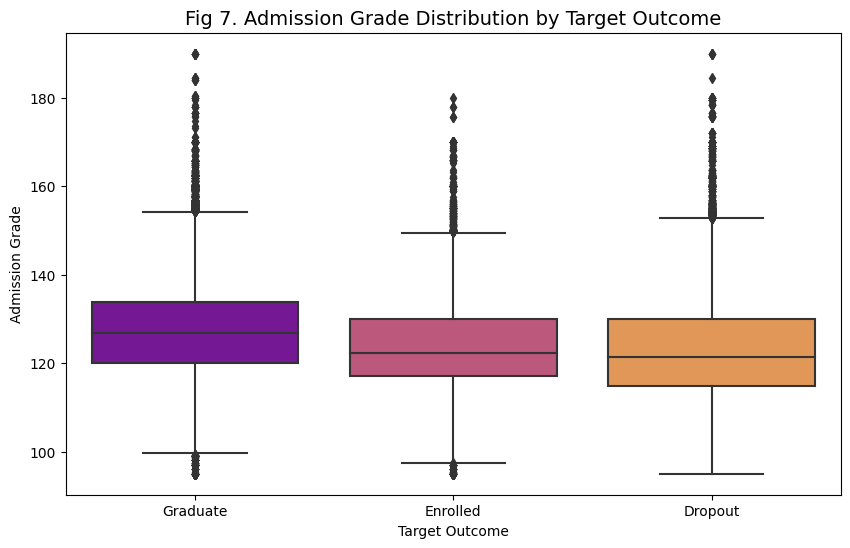

In [19]:
# Admission grade - boxplot
fig, ax = plt.subplots(1, 1, figsize=(10, 6)) # Create a new figure for the second plot
sns.boxplot(data=df, x='Target', y='Admission grade', ax=ax, palette='plasma', order=['Graduate', 'Enrolled', 'Dropout'])
ax.set_title('Fig 7. Admission Grade Distribution by Target Outcome', fontsize=14)
ax.set_xlabel('Target Outcome')
ax.set_ylabel('Admission Grade')

plt.show()

__Remarks:__
- Box plot shows the distribution of numerical data and skewness by displaying the data quartiles (or percentiles) and averages
- The IQR (Q3 - Q1) range of Graduate class spans fom 120 to ~ 135 (higher than the other two target classes). Additioanlly, the median admission grade is also substantially higher for Graduate class.
- The median of Enrolled and Dropout is similar, but Dropout's Q1 starts at around 115 grade.
- The minimum (Q1 - 1.5*IQR) for Dropout is at the lowest level among all classes.
- Outliers are present (positive outliers) indicating that there are exceptions to the general data distribution. For example, a lot of students have very high admission grade yet they also drop out. This only shows that the admission grade is not the most influential predictor of the Target class.

# 3. Data Preprocessing
<a id="3"></a>

First, let's split the data into X and y.

In [20]:
df = df.drop('id', axis=1)
X = df.drop('Target', axis = 1)
y = df['Target']

### 3.1 Encode the target

In [21]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)

### 3.2 Train / Test split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

### 3.3 Scaling numerical features

- It's important to fit scaler only on X_train and transform both X_train and X_test
- Scaling X before splitting, could result in a common mistake (data leakage)

In [23]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) # Only transform X_test

# 4. Fit Models - Random Forest Classifier with CV
<a id="4"></a>

### 4.1 Fit the model

CV steps:
1. Divide the training data into K equal folds, with stratified sample.
2. A loop is performed K times with one specific set of hyperparameters
3. The K individual scores are averaged. This average score represents the performance of that specific hyperparameter combination.
4. 2 and 3 are repeated for every single combination of hyperparameters defined in param_grid.
5. The combo with highest average score is selected.
6. Finally, GridSearchCV (by default, if refit=True) trains a final model on the entire training dataset (X_train_scaled, y_train) using the best_params_. This is the best_estimator_ used to make predictions on unseen X_test.

In [ ]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200],      # Number of estimators
    'max_features': ['sqrt', 0.6],   # Number of features to consider at each split
    'max_depth': [10, 20],           # Maximum depth of the tree (None means unlimited)
    'min_samples_split': [5, 10],    # Minimum number of samples required to split an internal node
    'min_samples_leaf': [2, 4],      # Minimum number of samples required to be at a leaf node
    'criterion': ['gini']            # Function to measure the quality of a split
}

# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42, n_jobs=-1) # n_jobs=-1 uses all available cores

Initialize GridSearchCV

- cv=2 means 2-fold cross-validation
- verbose=2 gives more output during fitting
- scoring='accuracy' (default for classification) or 'f1_weighted' if classes are imbalanced

In [ ]:
grid_search = GridSearchCV(estimator=rf_classifier,
                           param_grid=param_grid,
                           cv=2,
                           scoring='f1_weighted', # robust for imbalanced classes
                           verbose=2,
                           n_jobs=-1) # Use all available cores for parallel processing of grid search

# Fit GridSearchCV to the training data
print("Starting GridSearchCV...")
grid_search.fit(X_train_scaled, y_train)
print("GridSearchCV finished.")

Starting GridSearchCV...
Fitting 2 folds for each of 32 candidates, totalling 64 fits
GridSearchCV finished.


In [26]:
# Get the best parameters and best score
print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best cross-validation score (f1_weighted): {grid_search.best_score_:.4f}")

# Evaluate the best model on the test set
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test_scaled)

print("\n--- Test Set Evaluation ---")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=encoder.classes_))

Best parameters found: {'criterion': 'gini', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 100}
Best cross-validation score (f1_weighted): 0.8232

--- Test Set Evaluation ---
Test Accuracy: 0.8270
Classification Report:
               precision    recall  f1-score   support

     Dropout       0.90      0.82      0.86      5059
    Enrolled       0.65      0.59      0.62      2988
    Graduate       0.85      0.93      0.89      7257

    accuracy                           0.83     15304
   macro avg       0.80      0.78      0.79     15304
weighted avg       0.83      0.83      0.82     15304



__Remarks:__

- I reviewed the Kaggle leaderboard and the best accuracy in general oscilates around that number so the model looks good.
- Ofc, I would have to make a submission to see the actual test accuracy because the test.csv does not have a Target column.
- But looking at the parameters of the best model, it could be improved in several ways:
    - It looks like it performs better with fewer estimators (we could test a param set with less variance [80, 100, 120] and see how it performs)
    - Oversampling Enrolled class (imbalaced)), using SMOTE
        - Alternatively, we could use: RandomForestClassifier(class_weight = 'balanced') to balance the importance of Enrolled
    - Error analysis - could provide insights for feature engineering

# 5. Fit Models - XGBoost Classifier with CV
<a id="5"></a>

Time to compare the accuracy of Random Forest Classifier with a different model - XGBoost.

Numerical features are already scaled so we will go from there.

### 5.1 Fit the model

In [ ]:
param_grid_xgb = {
    'n_estimators': [100, 200],       # Number of boosting rounds (trees)
    'learning_rate': [0.05, 0.1],     # Step size shrinkage
    'max_depth': [3, 5],              # Maximum depth of a tree
    'subsample': [0.8, 1.0],          # Subsample ratio of the training instance
    'colsample_bytree': [0.8, 1.0],   # Subsample ratio of columns when constructing each tree
    'gamma': [0, 0.1]                 # Minimum loss reduction required
}

# Initialize the XGBClassifier
xgb_classifier = xgb.XGBClassifier(objective='multi:softprob',
                                   num_class=3, # number of unique classes
                                   eval_metric='mlogloss', # Metric for evaluation during training
                                   use_label_encoder=False, # Suppress warning
                                   random_state=42,
                                   n_jobs=-1)

# Initialize GridSearchCV with cv=2
grid_search_xgb = GridSearchCV(estimator=xgb_classifier,
                               param_grid=param_grid_xgb,
                               cv=2,                 
                               scoring='f1_weighted', # Consistent with RF
                               verbose=2,
                               n_jobs=-1)

# Fit GridSearchCV to the training data
print("Starting GridSearchCV for XGBoost (2-fold CV)")
grid_search_xgb.fit(X_train_scaled, y_train)
print("GridSearchCV for XGBoost finished.")

Starting GridSearchCV for XGBoost (2-fold CV)
Fitting 2 folds for each of 64 candidates, totalling 128 fits
GridSearchCV for XGBoost finished.


In [28]:
best_xgb_model = grid_search_xgb.best_estimator_
y_pred_xgb = best_xgb_model.predict(X_test_scaled)

print(f"\nXGBoost Best parameters: {grid_search_xgb.best_params_}")
print(f"XGBoost Best CV f1_weighted score: {grid_search_xgb.best_score_:.4f}")
print(f"XGBoost Validation Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")
print("XGBoost Classification Report on Validation Set:\n",
      classification_report(y_test, y_pred_xgb, target_names=encoder.classes_))


XGBoost Best parameters: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}
XGBoost Best CV f1_weighted score: 0.8288
XGBoost Validation Accuracy: 0.8312
XGBoost Classification Report on Validation Set:
               precision    recall  f1-score   support

     Dropout       0.90      0.83      0.86      5059
    Enrolled       0.66      0.60      0.63      2988
    Graduate       0.85      0.93      0.89      7257

    accuracy                           0.83     15304
   macro avg       0.80      0.79      0.79     15304
weighted avg       0.83      0.83      0.83     15304



### 5.2 RFC vs. XGBoost 

In [29]:
print("\n" + "="*70)
print("--- Model Comparison Summary (on Test Set) ---")
print("="*70)
print(f"Random Forest Classifier:")
print(f"  Best CV F1-weighted: {grid_search.best_score_:.4f}")
print(f"  Test Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\n")
print(f"XGBoost Classifier:")
print(f"  Best CV F1-weighted: {grid_search_xgb.best_score_:.4f}")
print(f"  Test Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")
print("="*70)


--- Model Comparison Summary (on Test Set) ---
Random Forest Classifier:
  Best CV F1-weighted: 0.8232
  Test Accuracy: 0.8270


XGBoost Classifier:
  Best CV F1-weighted: 0.8288
  Test Accuracy: 0.8312


XGBClassifier(objective='multi:softmax'):
- Best CV F1-weighted: 0.8288
- Test Accuracy: 0.8312

# 6. Fit Models - Ensemble Classifier 1 with CV
<a id="6"></a>

In the previous step I compared the two models. Let's now try combining them to see if they perform better.

### 6.1 Fit the model

In [ ]:
print("\n" + "="*70)
print("--- Ensemble 1: Random Forest + XGBoost (Soft Voting) ---")
print("="*70)

ensemble_rf_xgb = VotingClassifier(
    estimators=[
        ('rf', best_rf_model),
        ('xgb', best_xgb_model)
    ],
    voting='soft', # Using soft voting for probability averaging
    n_jobs=-1 # All cores enabled for ensemble prediction
)

print("Training Ensemble (RF + XGBoost)...")

# Since best_rf_model and best_xgb_model are already fitted, this mainly sets up the voting
ensemble_rf_xgb.fit(X_train_scaled, y_train)
print("Ensemble (RF + XGBoost) trained.")

y_pred_rf_xgb_ensemble = ensemble_rf_xgb.predict(X_test_scaled)

print("\nEnsemble (RF + XGBoost) Test Accuracy:",
      f"{accuracy_score(y_test, y_pred_rf_xgb_ensemble):.4f}")
print("Ensemble (RF + XGBoost) Classification Report on Validation Set:\n",
      classification_report(y_test, y_pred_rf_xgb_ensemble, target_names=encoder.classes_))


--- Ensemble 1: Random Forest + XGBoost (Soft Voting) ---
Training Ensemble (RF + XGBoost)...
Ensemble (RF + XGBoost) trained.

Ensemble (RF + XGBoost) Test Accuracy: 0.8317
Ensemble (RF + XGBoost) Classification Report on Validation Set:
               precision    recall  f1-score   support

     Dropout       0.90      0.82      0.86      5059
    Enrolled       0.66      0.60      0.63      2988
    Graduate       0.85      0.93      0.89      7257

    accuracy                           0.83     15304
   macro avg       0.80      0.79      0.79     15304
weighted avg       0.83      0.83      0.83     15304



__Remarks:__
- This ensemble slightly improves the accuracy compared to the two models alone. 

# 7. Fit Models - Ensemble Classifier 2 with CV
<a id="7"></a>


Let's add Logistic Regression model to the ensemble to see if it may improve the performance.

### 7.1 Fit the LR model

In [ ]:
param_grid_lr = {
    'C': [0.1, 1.0, 10.0], # Inverse of regularization strength
    'solver': ['saga'],   # 'saga' supports L1, L2, Elastic-Net and 'none' penalties, good for multi_class='multinomial'
    'multi_class': ['multinomial'] # Use 'multinomial' for true multi-class (softmax)
}

# Initialize Logistic Regression Classifier
lr_classifier = LogisticRegression(random_state=42, n_jobs=-1, max_iter=1000) # High max_iter for convergence

# Initialize GridSearchCV for Logistic Regression
grid_search_lr = GridSearchCV(estimator=lr_classifier,
                              param_grid=param_grid_lr,
                              cv=2,
                              scoring='f1_weighted',
                              verbose=2,
                              n_jobs=-1)

print("Starting GridSearchCV for Logistic Regression...")

grid_search_lr.fit(X_train_scaled, y_train)
print("GridSearchCV for Logistic Regression finished.")

best_lr_model = grid_search_lr.best_estimator_
y_pred_lr = best_lr_model.predict(X_test_scaled)

print(f"\nLogistic Regression Best parameters: {grid_search_lr.best_params_}")
print(f"Logistic Regression Best CV f1_weighted score: {grid_search_lr.best_score_:.4f}")
print(f"Logistic Regression Validation Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print("Logistic Regression Classification Report on Validation Set:\n",
      classification_report(y_test, y_pred_lr, target_names=encoder.classes_))

Starting GridSearchCV for Logistic Regression...
Fitting 2 folds for each of 3 candidates, totalling 6 fits
GridSearchCV for Logistic Regression finished.

Logistic Regression Best parameters: {'C': 10.0, 'multi_class': 'multinomial', 'solver': 'saga'}
Logistic Regression Best CV f1_weighted score: 0.8135
Logistic Regression Validation Accuracy: 0.8153
Logistic Regression Classification Report on Validation Set:
               precision    recall  f1-score   support

     Dropout       0.89      0.81      0.85      5059
    Enrolled       0.62      0.55      0.59      2988
    Graduate       0.84      0.92      0.88      7257

    accuracy                           0.82     15304
   macro avg       0.78      0.76      0.77     15304
weighted avg       0.81      0.82      0.81     15304



### 7.2 Fit the ensemble

In [ ]:
ensemble_all = VotingClassifier(
    estimators=[
        ('rf', best_rf_model),
        ('xgb', best_xgb_model),
        ('lr', best_lr_model)
    ],
    voting='soft', # Using soft voting
    n_jobs=-1
)

print("Training Ensemble (RF + XGBoost + LR)...")
ensemble_all.fit(X_train_scaled, y_train)
print("Ensemble (RF + XGBoost + LR) trained.")

Training Ensemble (RF + XGBoost + LR)...
Ensemble (RF + XGBoost + LR) trained.


In [33]:
y_pred_all_ensemble = ensemble_all.predict(X_test_scaled)

print("\nEnsemble (RF + XGBoost + LR) Validation Accuracy:",
      f"{accuracy_score(y_test, y_pred_all_ensemble):.4f}")
print("Ensemble (RF + XGBoost + LR) Classification Report on Validation Set:\n",
      classification_report(y_test, y_pred_all_ensemble, target_names=encoder.classes_))


Ensemble (RF + XGBoost + LR) Validation Accuracy: 0.8285
Ensemble (RF + XGBoost + LR) Classification Report on Validation Set:
               precision    recall  f1-score   support

     Dropout       0.90      0.82      0.86      5059
    Enrolled       0.65      0.59      0.62      2988
    Graduate       0.85      0.93      0.89      7257

    accuracy                           0.83     15304
   macro avg       0.80      0.78      0.79     15304
weighted avg       0.83      0.83      0.83     15304



# 8. Selected model and conclusions
<a id="8"></a>

In [34]:
print("\n" + "="*70)
print("--- Final Model Comparison Summary (on Validation Set) ---")
print("="*70)

print(f"Random Forest Classifier (Individual):")
print(f"  Best CV F1-weighted: {grid_search.best_score_:.4f}")
print(f"  Validation Accuracy: {accuracy_score(y_test, y_pred):.4f}")

print("\n")
print(f"XGBoost Classifier (Individual):")
print(f"  Best CV F1-weighted: {grid_search.best_score_:.4f}")
print(f"  Validation Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")

print("\n")
print(f"Logistic Regression (Individual):")
print(f"  Best CV F1-weighted: {grid_search_lr.best_score_:.4f}")
print(f"  Validation Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")

print("\n")
print(f"Ensemble (RF + XGBoost):")
print(f"  Validation Accuracy: {accuracy_score(y_test, y_pred_rf_xgb_ensemble):.4f}")

print("\n")
print(f"Ensemble (RF + XGBoost + LR):")
print(f"  Validation Accuracy: {accuracy_score(y_test, y_pred_all_ensemble):.4f}")
print("="*70)


--- Final Model Comparison Summary (on Validation Set) ---
Random Forest Classifier (Individual):
  Best CV F1-weighted: 0.8232
  Validation Accuracy: 0.8270


XGBoost Classifier (Individual):
  Best CV F1-weighted: 0.8232
  Validation Accuracy: 0.8312


Logistic Regression (Individual):
  Best CV F1-weighted: 0.8135
  Validation Accuracy: 0.8153


Ensemble (RF + XGBoost):
  Validation Accuracy: 0.8317


Ensemble (RF + XGBoost + LR):
  Validation Accuracy: 0.8285


### Conclusions:

- A total of 5 different models were proposed (3 individual, and 2 ensemble models.)
- The best accuracy on the validation (test) set was achieved with Ensemble (RF + XGBoost) with the score of 0.8317.
- It is clear that all models are not great at predicting Enrolled category, however the winner ensemble and XGBoost are the only models to achieve recall above 0.6
- Very high recall for Graduate - the model rarely missclassifies Graduate.
- Very high precision for 'Dropout' (when it says someone dropped out, it's usually right).

In [35]:
print("SELECTED MODEL: Ensemble (RF + XGBoost)\n",
      classification_report(y_test, y_pred_rf_xgb_ensemble, target_names=encoder.classes_))

SELECTED MODEL: Ensemble (RF + XGBoost)
               precision    recall  f1-score   support

     Dropout       0.90      0.82      0.86      5059
    Enrolled       0.66      0.60      0.63      2988
    Graduate       0.85      0.93      0.89      7257

    accuracy                           0.83     15304
   macro avg       0.80      0.79      0.79     15304
weighted avg       0.83      0.83      0.83     15304



### ROC

In order to plot averaged ROC curves for all models for comparison, we will have to binarize y_test. 

We do this because we have to visually represent TPs and FPs but we have a multi-class problem.

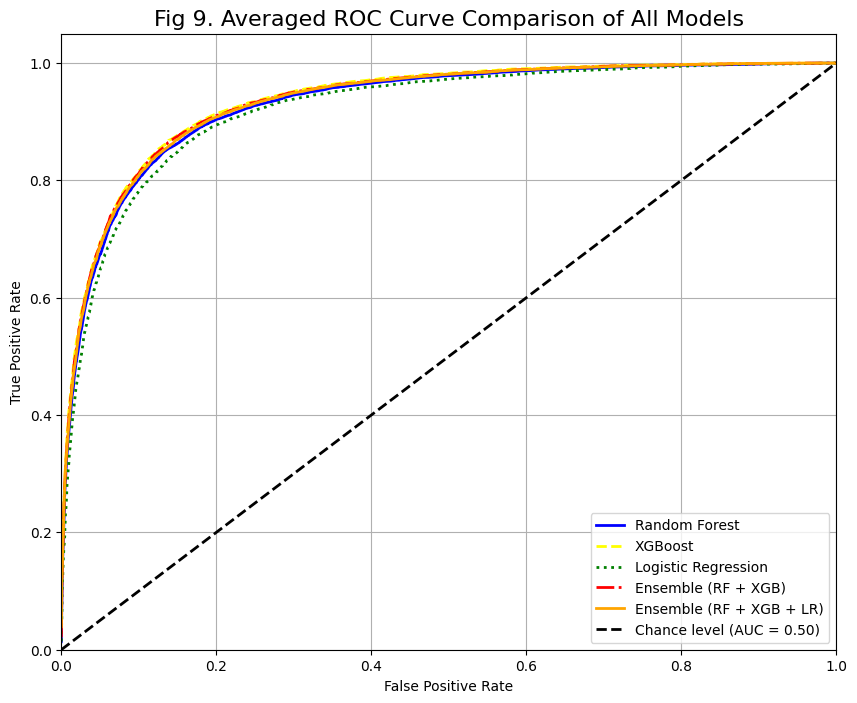


--- Macro-averaged AUC Scores Comparison ---
Random Forest: 0.9303
XGBoost: 0.9365
Logistic Regression: 0.9222
Ensemble (RF + XGB): 0.9349
Ensemble (RF + XGB + LR): 0.9337


In [36]:
# Get the number of classes for binarization
n_classes = len(encoder.classes_)

# Binarize the true labels once for all calculations
y_test_binarized = label_binarize(y_test, classes=np.arange(n_classes))

# Dictionary to store ROC data for each model
model_roc_data = {}

# List of models to plot
models_to_plot = {
    'Random Forest': best_rf_model,
    'XGBoost': best_xgb_model,
    'Logistic Regression': best_lr_model,
    'Ensemble (RF + XGB)': ensemble_rf_xgb,
    'Ensemble (RF + XGB + LR)': ensemble_all
}

# Loop through each model to calculate its macro-averaged ROC curve
for name, model in models_to_plot.items():
    # Get predicted probabilities
    y_prob = model.predict_proba(X_test_scaled)

    # Calculate FPR and TPR for each class
    fpr_per_class = dict()
    tpr_per_class = dict()
    
    for i in range(n_classes):
        fpr_per_class[i], tpr_per_class[i], _ = roc_curve(y_test_binarized[:, i], y_prob[:, i])

    # Aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr_per_class[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr_per_class[i], tpr_per_class[i])

    # Average it and compute AUC
    mean_tpr /= n_classes

    fpr_macro = all_fpr
    tpr_macro = mean_tpr
    roc_auc_macro = auc(fpr_macro, tpr_macro)

    model_roc_data[name] = {
        'fpr': fpr_macro,
        'tpr': tpr_macro,
        'auc': roc_auc_macro
    }

# Plotting
plt.figure(figsize=(10, 8))

colors = ['blue', 'yellow', 'green', 'red', 'orange']
linestyles = ['-', '--', ':', '-.', '-']

for i, (name, data) in enumerate(model_roc_data.items()):
    plt.plot(data['fpr'], data['tpr'],
             color=colors[i], linestyle=linestyles[i], linewidth=2,
             label=f'{name}')

# Plot the chance level (random classifier)
plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Chance level (AUC = 0.50)')

# Add plot labels and title
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Fig 9. Averaged ROC Curve Comparison of All Models', fontsize=16)
plt.legend(loc="lower right", fontsize=10)
plt.grid(True)
plt.show()

print("\n--- Macro-averaged AUC Scores Comparison ---")
for name, data in model_roc_data.items():
    print(f"{name}: {data['auc']:.4f}")

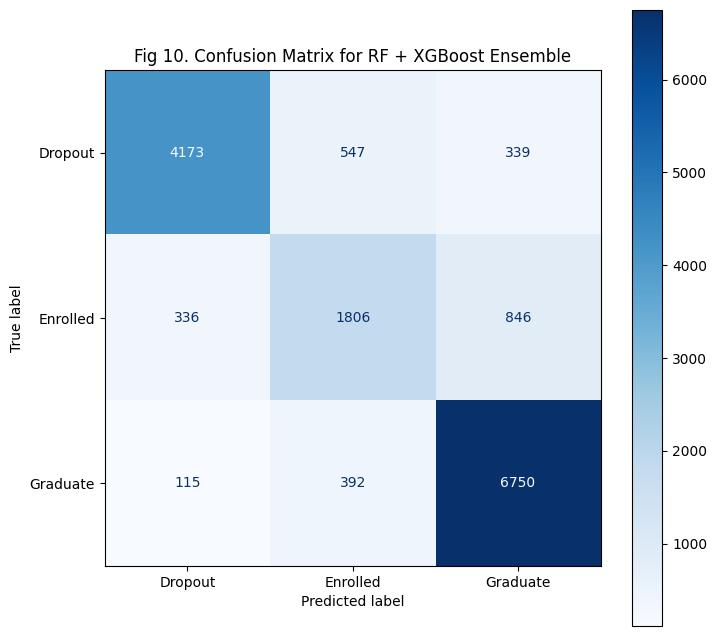

In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_rf_xgb_ensemble)

# Create the ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=encoder.classes_)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))
disp.plot(ax=ax, cmap=plt.cm.Blues, values_format='d') # 'd' for integer counts
plt.title('Fig 10. Confusion Matrix for RF + XGBoost Ensemble')
plt.show()

# 9. Feature importance
<a id="9"></a>

In [38]:
# Get feature importances from individual models
rf_importances = best_rf_model.feature_importances_
xgb_importances = best_xgb_model.feature_importances_

# Check if feature importances arrays have the same length as X_train.columns
if len(rf_importances) != len(X_train.columns) or len(xgb_importances) != len(X_train.columns):
    raise ValueError("Feature importances array length mismatch with X_train.columns. "
                     "Ensure models were trained on the same number of features as X_train.")

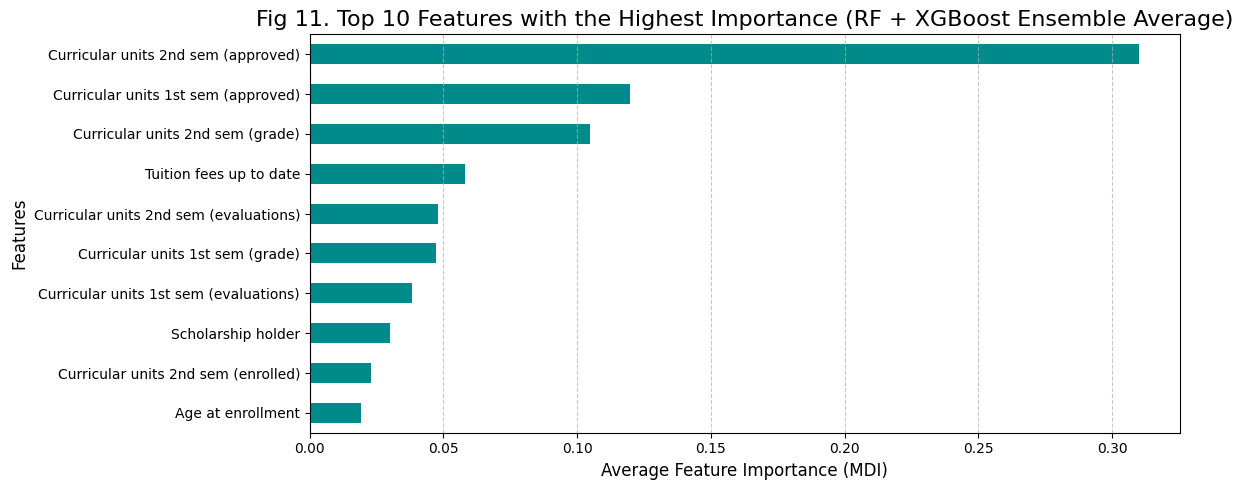

In [ ]:
# Average the feature importances
ensemble_importances = (rf_importances + xgb_importances) / 2

# Create a pd.Series of features importances
importances = pd.Series(data=ensemble_importances,
                        index=X_train.columns) # Use X_train.columns for readable names

# Sort importances
importances_sorted = importances.sort_values(ascending=True) # Sort ascending to plot largest at top

# Show top 10 features
num_features = len(importances_sorted)
top_n = min(10, num_features)

top_30_importances = importances_sorted[-top_n:] # Select the last 'top_n' values

# horizontal barplot
plt.figure(figsize=(12, min(8, top_n * 0.5)))
top_30_importances.plot(kind='barh', color='darkcyan')
plt.title(f'Fig 11. Top {top_n} Features with the Highest Importance (RF + XGBoost Ensemble Average)', fontsize=16)
plt.xlabel('Average Feature Importance (MDI)', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Clearly, second semester's courses and obtained grades are quite decisive features for determining the Target classes.

Feature importance (Mean Decrease Impurity - MDI) is calculated based on how much a feature reduces impurity (e.g., Gini impurity) across all splits in the trees.

While useful, MDI can be biased towards high-cardinality features or correlated features. Permutation importance is an alternative for more robust evaluation.


---

# 10. Submission file
<a id="10"></a>

In [40]:
test_df = pd.read_csv('test.csv')
test_df.info()

test_ids = test_df['id']

X_test = test_df.drop('id', axis=1)

# Ensuring that column order in test.csv is the same
X_test = X_test[X_train.columns]

# Scale
X_test_final_scaled = scaler.transform(X_test)

test_predictions_encoded = ensemble_rf_xgb.predict(X_test_final_scaled)

# Inverse transform predictions back to original labels
test_predictions_labels = encoder.inverse_transform(test_predictions_encoded)

# My submission file
submission_df = pd.DataFrame({'id': test_ids, 'Target': test_predictions_labels})
submission_df.to_csv('submission_Maciej.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51012 entries, 0 to 51011
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   id                                              51012 non-null  int64  
 1   Marital status                                  51012 non-null  int64  
 2   Application mode                                51012 non-null  int64  
 3   Application order                               51012 non-null  int64  
 4   Course                                          51012 non-null  int64  
 5   Daytime/evening attendance                      51012 non-null  int64  
 6   Previous qualification                          51012 non-null  int64  
 7   Previous qualification (grade)                  51012 non-null  float64
 8   Nacionality                                     51012 non-null  int64  
 9   Mother's qualification                 